In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline



In [2]:
df = pd.read_csv('20200201.csv')

In [3]:
df

,content_id,if_ad,view_cnt,imp_cnt,ctr
0,115906226,0,11.0,109,0.100917
1,93488047,0,1.0,12,0.083333
2,116095702,0,3.0,145,0.020690
3,115701328,0,1.0,27,0.037037
4,113808309,0,4.0,76,0.052632
...,...,...,...,...,...
5951725,112924438,0,NaN,1,NaN
5951726,102318996,0,NaN,1,NaN
5951727,108005893,0,NaN,1,NaN
5951728,115438650,0,NaN,1,NaN


In [4]:
df = df[df['ctr'] < 1]

In [5]:
df['ctr'] = df['ctr']*100

/Users/emilyPark/.pyenv/versions/3.7.5/envs/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
low = df[(df['ctr'] < 2) & (df['view_cnt'] > 30)]
high = df[(df['ctr'] > 5) & (df['view_cnt'] > 190)]

In [11]:
low = low.sample(n=250)
high = high.sample(n=250)

In [12]:
low_ids = ','.join('\''+str(i)+'\'' for i in low['content_id'].tolist())
high_ids = ','.join('\''+str(i)+'\'' for i in high['content_id'].tolist())

In [46]:
high_ids

"'116384116','116304078','115151796','116404685','116137091','116385064','116368784','116336384','116365508','116365849','116399639','116375641','116365841','116361142','116392591','116271508','116356648','116275312','109178313','116356537','116325429','90245939','116041058','116359141','115215404','116353084','116358032','111714063','116350840','116388538','116222345','116374951','116334112','116367340','116384644','115864294','116335229','116237526','116177358','116378468','116332330','116352006','116258507','116358334','113930753','116367689','116318846','116111971','116239252','116323528','116376015','106501762','116230482','116320538','116353151','116364843','116350101','116336250','116336368','116311364','116365280','113578035','116347944','96492708','116361089','116376747','116305871','116388987','116053891','116372426','116356966','116259285','116046994','116361404','116378753','116342957','115277331','116355336','81372301','116311023','104340289','116370728','111269529','11637

In [15]:
low_viewer = pd.read_csv('20200201_low_viewer.csv')
high_viewer = pd.read_csv('20200201_high_viewer.csv')

In [16]:
low_viewer.columns

Index(['user_id', 'page_id', 'content_position', 'ref_page_id', 'sex',
       'follower_cnt', 'age_detail', 'case'],
      dtype='object')

In [18]:
### 성별
low_viewer.groupby('sex', as_index=False)['user_id'].count()

,sex,user_id
0,0,320
1,1,16249
2,2,29302


In [19]:
high_viewer.groupby('sex',as_index=False)['user_id'].count()

,sex,user_id
0,0,800
1,1,38400
2,2,65946


In [20]:
### page_id
low_viewer.groupby('page_id', as_index=False)['user_id'].count()

,page_id,user_id
0,검색,1
1,검색결과,203
2,내상점,2
3,마이페이지,13
4,번개톡,32
5,상점상세,11
6,상품상세,45420
7,카테고리,36
8,홈,153


In [21]:
high_viewer.groupby('page_id', as_index=False)['user_id'].count()

,page_id,user_id
0,검색,2
1,검색결과,243
2,내상점,5
3,마이페이지,25
4,번개톡,103
5,상점상세,57
6,상품상세,104616
7,카테고리,17
8,홈,78


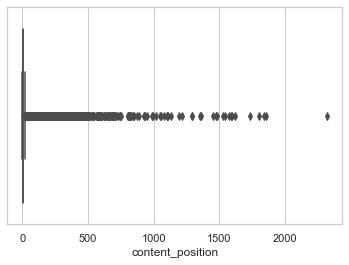

In [22]:
### content_position
sns.set(style="whitegrid")
ax = sns.boxplot(x=low_viewer['content_position'])

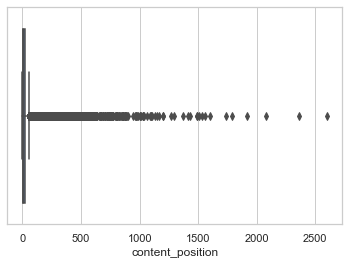

In [23]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=high_viewer['content_position'])

/Users/emilyPark/.pyenv/versions/3.7.5/envs/bun-analytics/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/emilyPark/.pyenv/versions/3.7.5/envs/bun-analytics/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


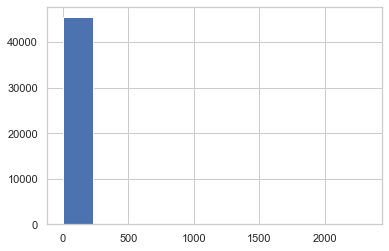

In [24]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(low_viewer['content_position'])
plt.show()

In [27]:
### ref_page_id
low_viewer.groupby('ref_page_id',as_index=False)['user_id'].count()

,ref_page_id,user_id
0,(우리동네),419
1,검색,21
2,검색결과,14495
3,내상점,10
4,마이페이지,442
5,번개톡,200
6,상점상세,559
7,상품상세,3804
8,카테고리,1531
9,카테고리_검색결과,54


In [28]:
high_viewer.groupby('ref_page_id',as_index=False)['user_id'].count()

,ref_page_id,user_id
0,(우리동네),138
1,검색,19
2,검색결과,66688
3,내상점,30
4,마이페이지,1040
5,번개톡,1711
6,상점상세,1438
7,상품상세,7463
8,카테고리,2339
9,카테고리_검색결과,62


In [30]:
### age
low_viewer.groupby('case',as_index=False)['user_id'].count()

,case,user_id
0,10,11710
1,20,24500
2,30,4886
3,40,4775


In [31]:
high_viewer.groupby('case',as_index=False)['user_id'].count()

,case,user_id
0,10,29509
1,20,57418
2,30,10582
3,40,7637


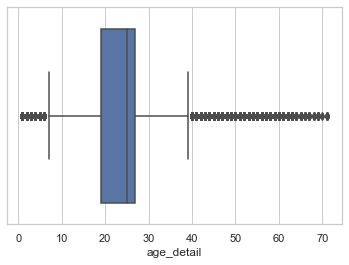

In [34]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=low_viewer[low_viewer['age_detail'] > 0]['age_detail'])

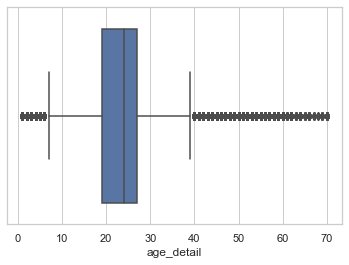

In [35]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=high_viewer[high_viewer['age_detail'] > 0]['age_detail'])

In [39]:
### 루트
route = []
for i in range(len(low_viewer)):
    t = low_viewer.loc[i]
    route.append(str(t['ref_page_id']) + ' ' + str(t['page_id']))
low_viewer['route'] = route

In [42]:
route = []
for i in range(len(high_viewer)):
    t = high_viewer.loc[i]
    route.append(str(t['ref_page_id']) + ' ' + str(t['page_id']))
high_viewer['route'] = route

In [44]:
low_viewer.groupby('route',as_index=False)['user_id'].count().to_csv('low_route.csv',index=False)
high_viewer.groupby('route',as_index=False)['user_id'].count().to_csv('high_route.csv', index=False)